#📌 Extracão

In [8]:
import pandas as pd
import requests
import json


url_dados = 'https://raw.githubusercontent.com/jhonatanwsds/TelecomX_BR/refs/heads/main/TelecomX_Data.json'

try:
    response = requests.get(url_dados)
    response.raise_for_status()
    data = json.loads(response.text)

    dados_clientes = pd.json_normalize(data)

    print("Dados extraídos e organizados com sucesso da forma simples!")
    display(dados_clientes.head())

except Exception as e:
    print(f"Ocorreu um erro: {e}")

Dados extraídos e organizados com sucesso da forma simples!


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [13]:
import pandas as pd
import numpy as np

print("--- Iniciando a Transformação e Limpeza dos Dados ---")

# --- 1. CORREÇÃO DOS DADOS ---

dados_clientes['account.Charges.Total'] = pd.to_numeric(dados_clientes['account.Charges.Total'], errors='coerce')

dados_clientes['Churn'] = dados_clientes['Churn'].replace('', np.nan)

dados_clientes.dropna(inplace=True)

print("\n[PASSO 1] Dados problemáticos corrigidos e removidos.")

# --- 2. VERIFICAÇÃO FINAL ---

print("\n--- Verificação Pós-Limpeza ---")

# Confirma que não há mais valores ausentes
print(f"\nValores ausentes restantes: {dados_clientes.isnull().sum().sum()}")

# Confirma que não há clientes duplicados
print(f"Clientes duplicados restantes: {dados_clientes['customerID'].duplicated().sum()}")

# Mostra os valores únicos na coluna Churn para provar que o '' sumiu
print(f"Valores únicos em 'Churn' agora: {pd.unique(dados_clientes['Churn'])}")

# Mostra o status final do DataFrame
print("\n--- Estrutura Final dos Dados (Pronto para Análise) ---")
dados_clientes.info()

--- Iniciando a Transformação e Limpeza dos Dados ---

[PASSO 1] Dados problemáticos corrigidos e removidos.

--- Verificação Pós-Limpeza ---

Valores ausentes restantes: 0
Clientes duplicados restantes: 0
Valores únicos em 'Churn' agora: ['No' 'Yes']

--- Estrutura Final dos Dados (Pronto para Análise) ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines     

Criando a coluna 'Contas_Diarias'

In [14]:
import pandas as pd

print("--- Criando a coluna 'Contas_Diarias' ---")

dados_clientes['Contas_Diarias'] = dados_clientes['account.Charges.Monthly'] / 30

print("\nColuna 'Contas_Diarias' criada com sucesso. Veja a amostra:")
print(dados_clientes[['customerID', 'account.Charges.Monthly', 'Contas_Diarias']].head())


print("\n--- Estrutura Final dos Dados com a Nova Coluna ---")
dados_clientes.info()

--- Criando a coluna 'Contas_Diarias' ---

Coluna 'Contas_Diarias' criada com sucesso. Veja a amostra:
   customerID  account.Charges.Monthly  Contas_Diarias
0  0002-ORFBO                     65.6        2.186667
1  0003-MKNFE                     59.9        1.996667
2  0004-TLHLJ                     73.9        2.463333
3  0011-IGKFF                     98.0        3.266667
4  0013-EXCHZ                     83.9        2.796667

--- Estrutura Final dos Dados com a Nova Coluna ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Depend

Padronização

In [15]:
import pandas as pd

print("--- Padronizando e Transformando os Dados ---")

# --- 1. Renomeando as colunas para nomes mais simples ---
print("\nNomes das colunas ANTES da padronização:")
print(dados_clientes.columns.tolist())

dados_clientes.columns = [col.split('.')[-1] for col in dados_clientes.columns]

print("\nNomes das colunas DEPOIS da padronização:")
print(dados_clientes.columns.tolist())


# --- 2. Convertendo colunas 'Yes'/'No' para Binário (1/0) ---
colunas_binarias = [
    'Churn',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling'
]

mapa_sim_nao = {'Yes': 1, 'No': 0}

for coluna in colunas_binarias:
    dados_clientes[coluna] = dados_clientes[coluna].replace(mapa_sim_nao)

print(f"\nColunas {colunas_binarias} convertidas para 1 e 0.")
print("\nAmostra dos dados após a conversão:")
print(dados_clientes[colunas_binarias].head())


# --- Verificação Final ---
print("\n--- Estrutura Final dos Dados Após Padronização ---")
dados_clientes.info()

--- Padronizando e Transformando os Dados ---

Nomes das colunas ANTES da padronização:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias']

Nomes das colunas DEPOIS da padronização:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total', 'Contas_Diarias']

Colunas ['Churn', 'Partner', 'Depend

/tmp/ipython-input-15-3049600255.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_clientes[coluna] = dados_clientes[coluna].replace(mapa_sim_nao)


#📊 Carga e análise

In [16]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)


print("--- Análise Descritiva das Variáveis Numéricas ---")
display(dados_clientes.describe().T)


print("\n\n--- Análise Descritiva das Variáveis Categóricas ---")

display(dados_clientes.describe(include=['object']).T)

--- Análise Descritiva das Variáveis Numéricas ---


,count,mean,std,min,25%,50%,75%,max
Churn,7032.00,0.27,0.44,0.00,0.00,0.00,1.00,1.00
SeniorCitizen,7032.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
Partner,7032.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00
Dependents,7032.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
tenure,7032.00,32.42,24.55,1.00,9.00,29.00,55.00,72.00
PhoneService,7032.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
PaperlessBilling,7032.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00
Monthly,7032.00,64.80,30.09,18.25,35.59,70.35,89.86,118.75
Total,7032.00,2283.30,2266.77,18.80,401.45,1397.47,3794.74,8684.80
Contas_Diarias,7032.00,2.16,1.00,0.61,1.19,2.34,3.00,3.96




--- Análise Descritiva das Variáveis Categóricas ---


,count,unique,top,freq
customerID,7032,7032,9995-HOTOH,1
gender,7032,2,Male,3549
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472
StreamingTV,7032,3,No,2809
StreamingMovies,7032,3,No,2781


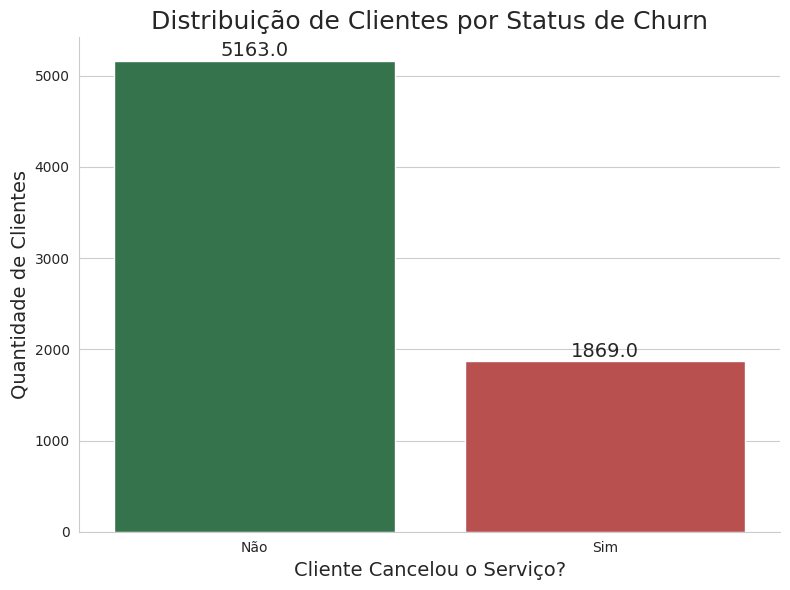

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define o estilo do gráfico
sns.set_style('whitegrid')

# Define o tamanho da figura
plt.figure(figsize=(8, 6))


ax = sns.countplot(
    data=dados_clientes,
    x='Churn',
    hue='Churn',
    palette=['#2a7d48', '#c93f3f'],
    legend=False
)

# Adiciona os números exatos em cima de cada barra (como antes)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        x=patch.get_x() + patch.get_width() / 2,
        y=height + 50,  # Aumentei um pouco o espaço para ficar mais bonito
        s=f'{height}',
        ha='center',
        fontsize=14
    )

# Ajusta os títulos e os rótulos dos eixos
ax.set_title('Distribuição de Clientes por Status de Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou o Serviço?', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Não', 'Sim'])

# Remove as "bordas" de cima e da direita para um visual mais limpo
sns.despine()

# Ajusta o espaçamento
plt.tight_layout()

# Exibe o gráfico
plt.show()

--- Gráfico de Pizza: Proporção de Churn ---


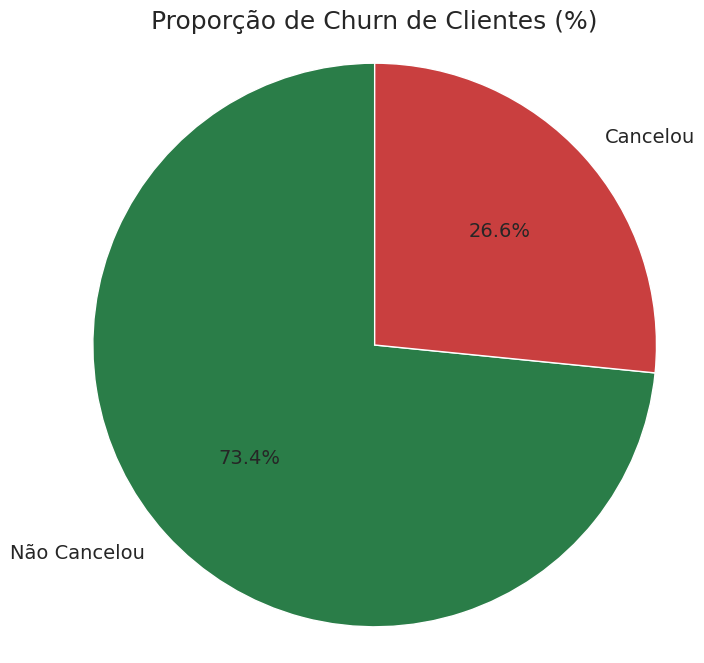

In [21]:
import matplotlib.pyplot as plt

# --- Gráfico de Pizza: Proporção de Churn (%) ---

print("--- Gráfico de Pizza: Proporção de Churn ---")

churn_counts = dados_clientes['Churn'].value_counts()

labels = ['Não Cancelou', 'Cancelou']

colors = ['#2a7d48', '#c93f3f']

plt.figure(figsize=(8, 8))

# 5. Cria o gráfico de pizza

plt.pie(
    churn_counts,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    textprops={'fontsize': 14}
)

# Adiciona o título do gráfico
plt.title('Proporção de Churn de Clientes (%)', fontsize=18)

# Garante que o círculo seja desenhado corretamente
plt.axis('equal')

# Exibe o gráfico
plt.show()

Análise de Churn por Tipo de Contrato

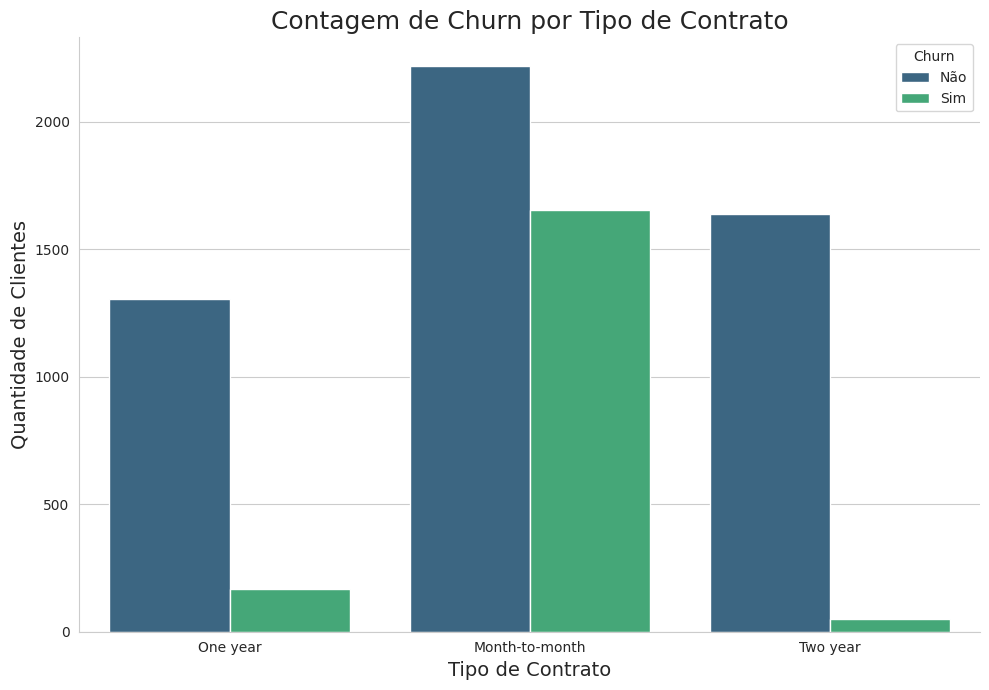

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))

# Usamos 'hue="Churn"' para criar barras agrupadas para quem cancelou (1) e quem não cancelou (0)
ax = sns.countplot(data=dados_clientes, x='Contract', hue='Churn', palette='viridis')

# Títulos e rótulos
ax.set_title('Contagem de Churn por Tipo de Contrato', fontsize=18)
ax.set_xlabel('Tipo de Contrato', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Melhora a legenda
plt.legend(title='Churn', labels=['Não', 'Sim'])
sns.despine()
plt.tight_layout()
plt.show()

 Análise de Churn por Forma de Pagamento

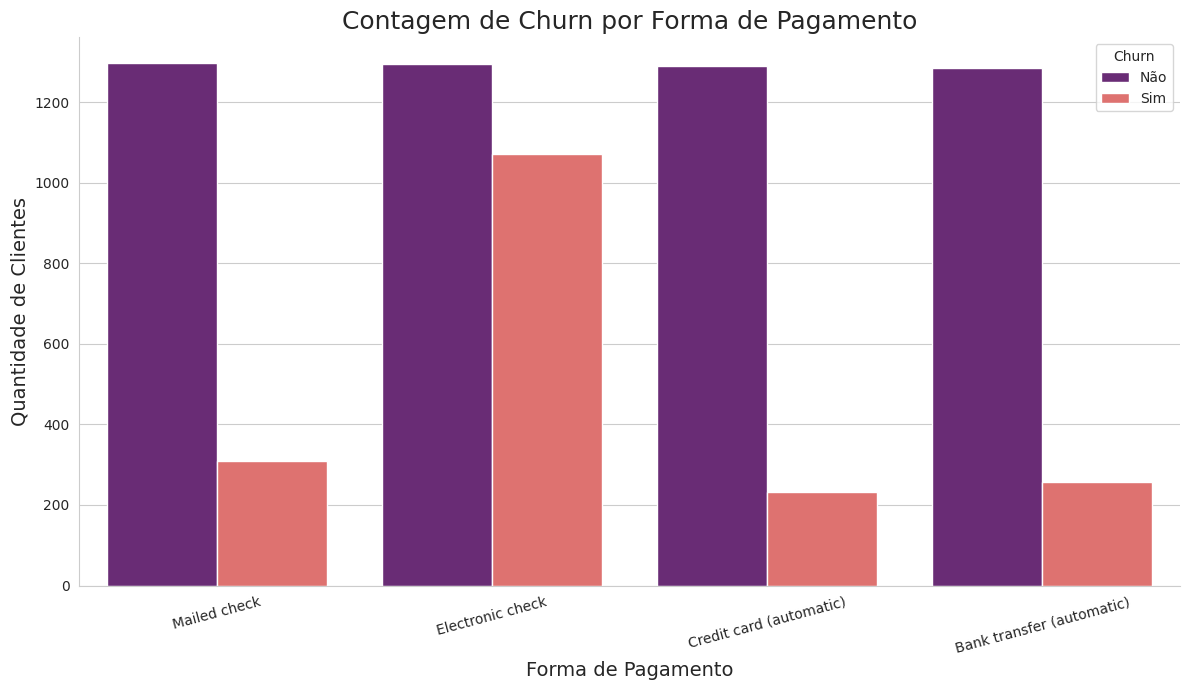

In [23]:
plt.figure(figsize=(12, 7))

# Rotacionamos os rótulos do eixo X para não ficarem sobrepostos
plt.xticks(rotation=15)

ax = sns.countplot(data=dados_clientes, x='PaymentMethod', hue='Churn', palette='magma')

# Títulos e rótulos
ax.set_title('Contagem de Churn por Forma de Pagamento', fontsize=18)
ax.set_xlabel('Forma de Pagamento', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Melhora a legenda
plt.legend(title='Churn', labels=['Não', 'Sim'])
sns.despine()
plt.tight_layout()
plt.show()

Análise de Churn por Serviço de Internet

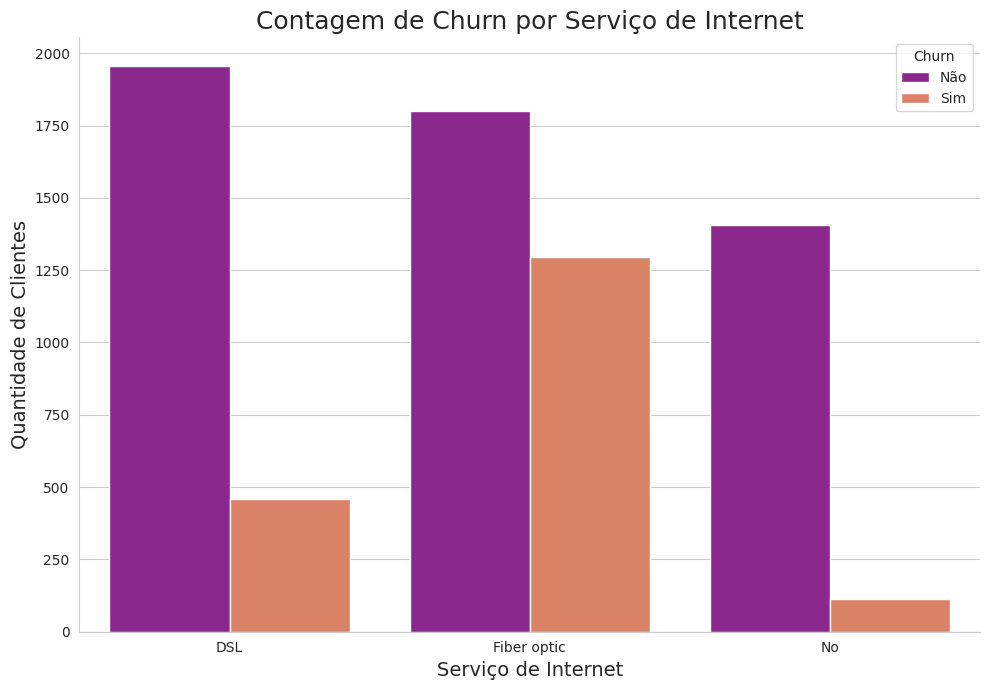

In [24]:
plt.figure(figsize=(10, 7))

ax = sns.countplot(data=dados_clientes, x='InternetService', hue='Churn', palette='plasma')

# Títulos e rótulos
ax.set_title('Contagem de Churn por Serviço de Internet', fontsize=18)
ax.set_xlabel('Serviço de Internet', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Melhora a legenda
plt.legend(title='Churn', labels=['Não', 'Sim'])
sns.despine()
plt.tight_layout()
plt.show()

Análise de Churn por Gênero

/tmp/ipython-input-25-2866763412.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Feminino', 'Masculino'])


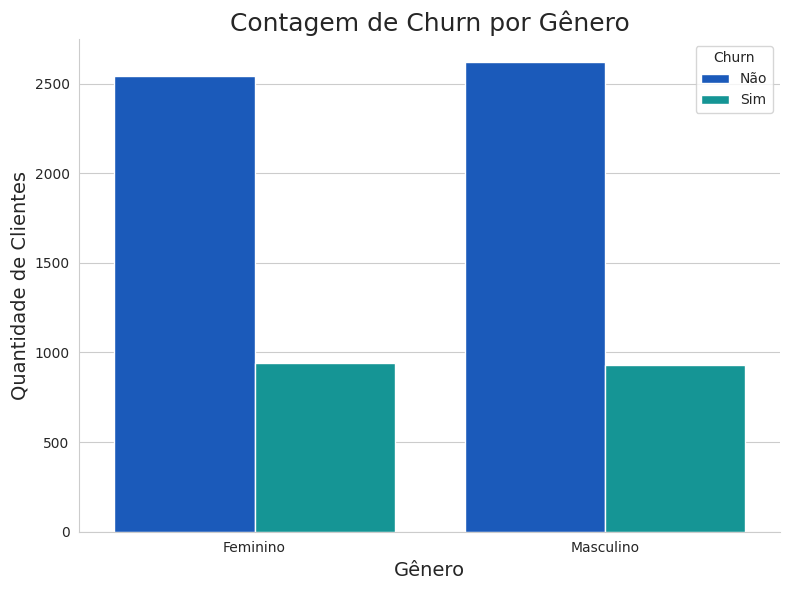

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o estilo
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))

# Cria o gráfico de barras agrupado por gênero e Churn
ax = sns.countplot(data=dados_clientes, x='gender', hue='Churn', palette='winter')

# Adiciona títulos e rótulos
ax.set_title('Contagem de Churn por Gênero', fontsize=18)
ax.set_xlabel('Gênero', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Renomeia as legendas e os rótulos do eixo X
plt.legend(title='Churn', labels=['Não', 'Sim'])
ax.set_xticklabels(['Feminino', 'Masculino'])

sns.despine()
plt.tight_layout()
plt.show()

Análise de Churn por Tempo de Contrato (Tenure)

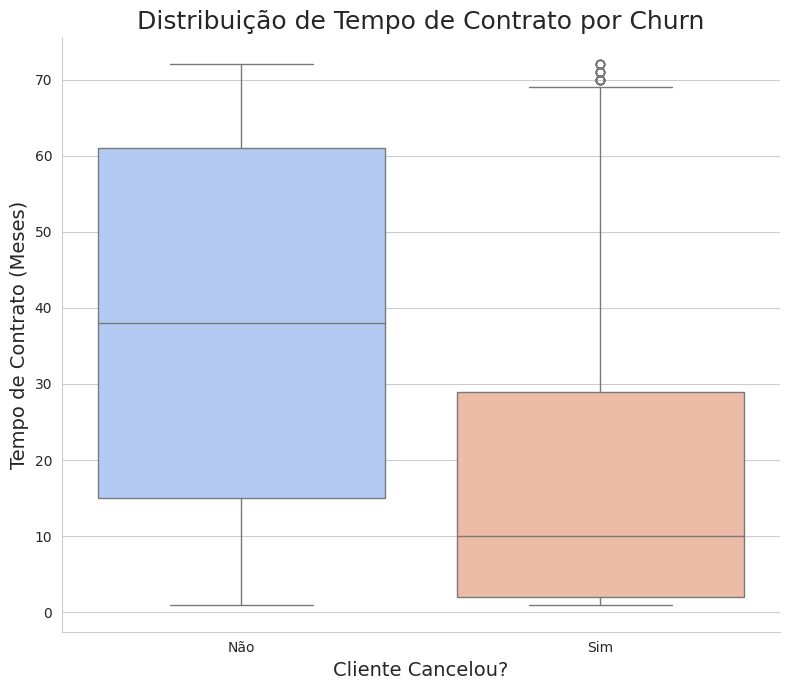

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(8, 7))


ax = sns.boxplot(
    data=dados_clientes,
    x='Churn',
    y='tenure',
    hue='Churn',
    legend=False,
    palette='coolwarm'
)

# Títulos e rótulos
ax.set_title('Distribuição de Tempo de Contrato por Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou?', fontsize=14)
ax.set_ylabel('Tempo de Contrato (Meses)', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Não', 'Sim'])

sns.despine()
plt.tight_layout()
plt.show()

Análise de Churn por Cobrança Mensal (Monthly)

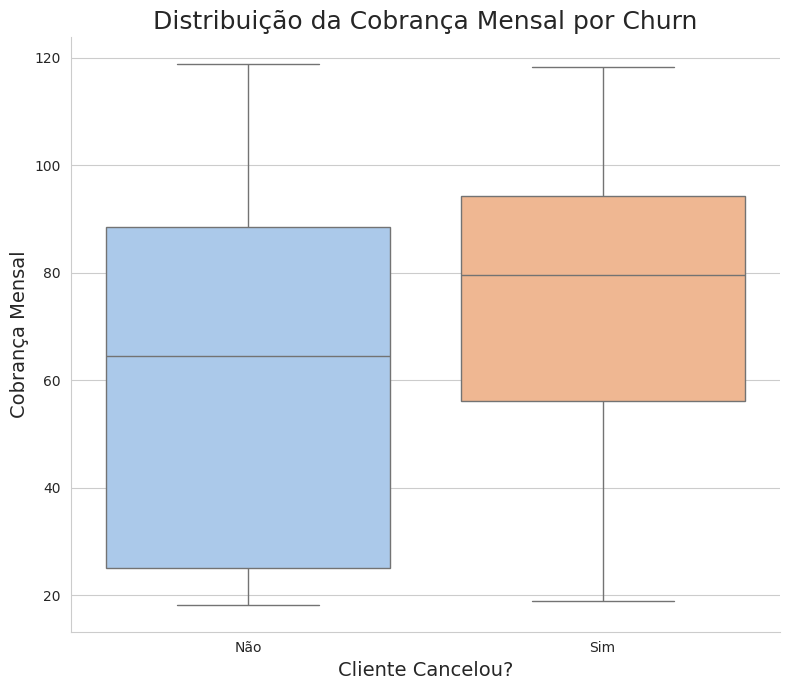

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))

ax = sns.boxplot(
    data=dados_clientes,
    x='Churn',
    y='Monthly',
    hue='Churn',
    legend=False,
    palette='pastel'
)

# Títulos e rótulos
ax.set_title('Distribuição da Cobrança Mensal por Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou?', fontsize=14)
ax.set_ylabel('Cobrança Mensal', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Não', 'Sim'])

sns.despine()
plt.tight_layout()
plt.show()

#📄Relatorio Final

# Relatório Final: Análise de Evasão de Clientes (Churn) da Telecom X

## 1. Introdução
O objetivo desta análise foi explorar um conjunto de dados da empresa fictícia "Telecom X" para identificar os principais fatores que levam os clientes a cancelarem seus serviços — um fenômeno conhecido como Churn.

O Churn, ou evasão de clientes, é uma métrica vital para empresas de serviço, pois o custo de adquirir um novo cliente é geralmente muito superior ao de manter um existente. Compreender os perfis e comportamentos dos clientes que cancelam permite à empresa desenvolver estratégias focadas em aumentar a satisfação e a retenção, impactando diretamente a saúde financeira do negócio.

## 2. Limpeza e Tratamento de Dados
Para garantir a qualidade e a precisão da análise, os dados brutos, fornecidos em formato JSON, passaram por um rigoroso processo de tratamento. As principais etapas foram:

Extração e Normalização: Os dados foram carregados a partir de um link do GitHub. A estrutura aninhada do JSON foi transformada em uma tabela plana e organizada usando a função pandas.json_normalize.

Tratamento de Inconsistências: A coluna de cobrança total (Total), que estava formatada como texto, foi convertida para um tipo numérico. Também identificamos e removemos registros que continham informações vazias na coluna Churn.

Engenharia de Atributos: Criamos uma nova coluna, Contas_Diarias, a partir da cobrança mensal para permitir análises mais detalhadas, embora ela não tenha sido o foco principal das visualizações subsequentes.

Padronização de Dados: Para facilitar a leitura e a manipulação, os nomes das colunas foram simplificados (ex: de customer.gender para gender). Além disso, colunas com respostas "Yes" e "No" foram convertidas para o formato numérico binário (1 e 0), preparando os dados para futuras análises matemáticas e modelos de machine learning.

In [34]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   int64  
 5   Dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   int64  
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

## 3. Análise Exploratória e Padrões de Churn
Nesta fase, investigamos os dados limpos para encontrar padrões visuais que pudessem explicar o comportamento de Churn.

Proporção Geral de Churn
A primeira análise revelou a dimensão do problema de evasão na empresa. O gráfico de pizza abaixo demonstra que cerca de 26,6% dos clientes na nossa base de dados cancelaram o serviço, um número significativo que justifica uma investigação aprofundada.

--- Gráfico de Pizza: Proporção de Churn ---


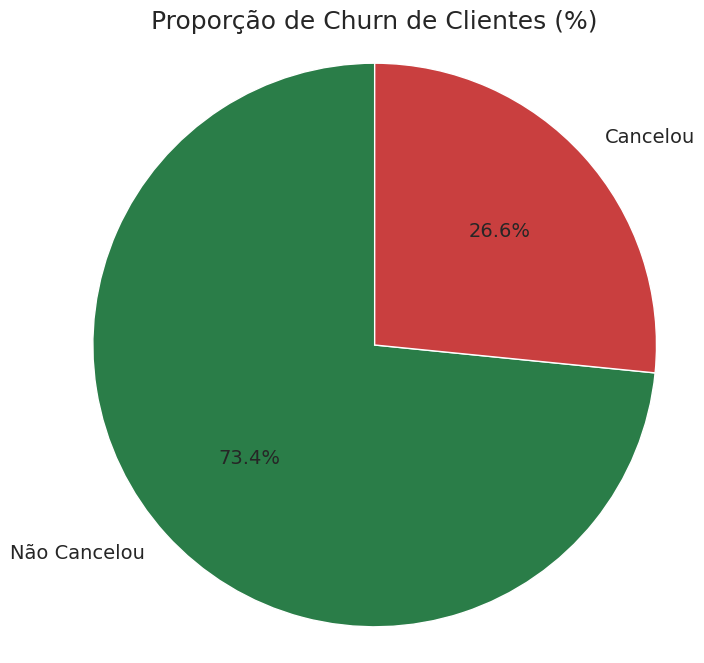

In [35]:
import matplotlib.pyplot as plt

# --- Gráfico de Pizza: Proporção de Churn (%) ---

print("--- Gráfico de Pizza: Proporção de Churn ---")

churn_counts = dados_clientes['Churn'].value_counts()

labels = ['Não Cancelou', 'Cancelou']

colors = ['#2a7d48', '#c93f3f']

plt.figure(figsize=(8, 8))

# 5. Cria o gráfico de pizza

plt.pie(
    churn_counts,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    textprops={'fontsize': 14}
)

# Adiciona o título do gráfico
plt.title('Proporção de Churn de Clientes (%)', fontsize=18)

# Garante que o círculo seja desenhado corretamente
plt.axis('equal')

# Exibe o gráfico
plt.show()

Principais Fatores de Influência no Churn
Ao cruzarmos os dados de Churn com outras variáveis, alguns padrões muito claros emergiram:

Impacto do Tipo de Contrato: O tipo de contrato é um dos indicadores mais fortes de Churn. Clientes com contrato "Mês a mês" apresentam uma taxa de cancelamento drasticamente maior do que aqueles com contratos de longo prazo (1 ou 2 anos), que possuem uma taxa de retenção muito alta.

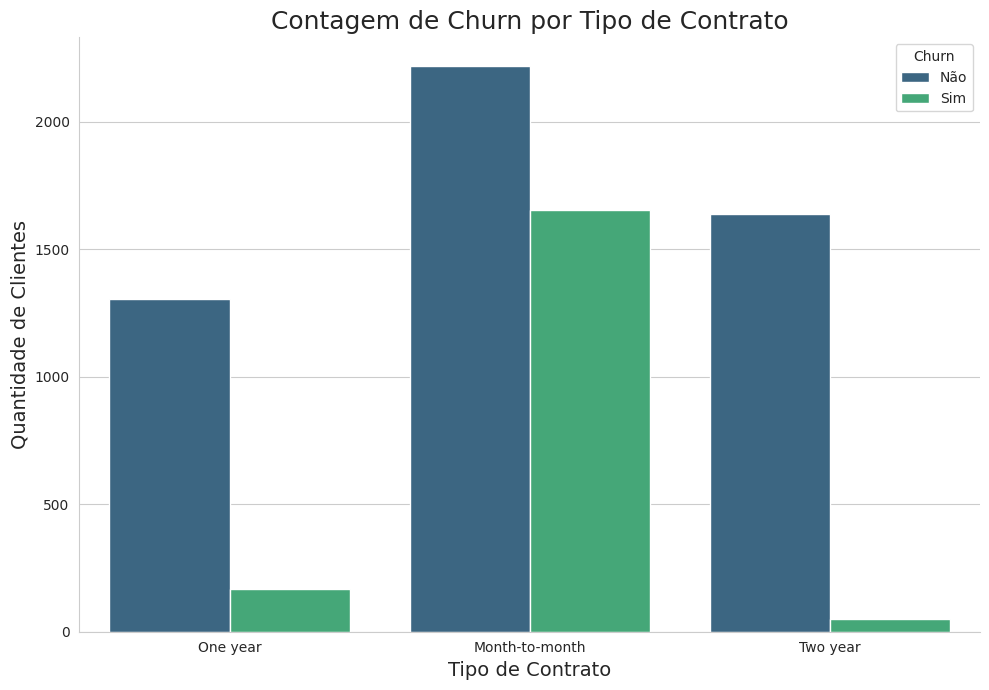

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))

# Usamos 'hue="Churn"' para criar barras agrupadas para quem cancelou (1) e quem não cancelou (0)
ax = sns.countplot(data=dados_clientes, x='Contract', hue='Churn', palette='viridis')

# Títulos e rótulos
ax.set_title('Contagem de Churn por Tipo de Contrato', fontsize=18)
ax.set_xlabel('Tipo de Contrato', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)

# Melhora a legenda
plt.legend(title='Churn', labels=['Não', 'Sim'])
sns.despine()
plt.tight_layout()
plt.show()

Relação com o Tempo de Contrato (Tenure): O tempo de permanência do cliente na empresa também é um fator decisivo. O box plot revela que a mediana de tempo de contrato para clientes que cancelam é muito inferior à dos que permanecem. Isso indica que o maior risco de cancelamento ocorre nos primeiros meses de serviço.

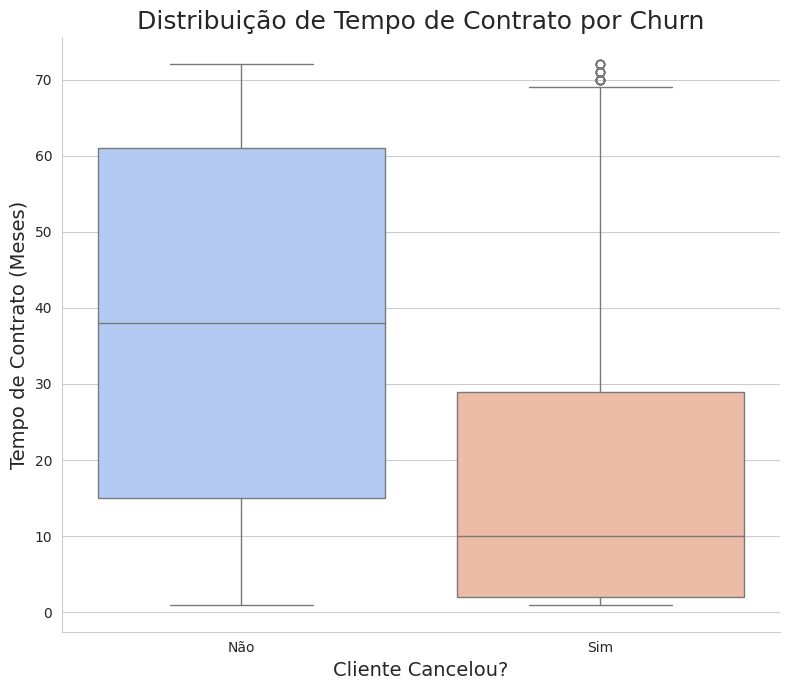

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(8, 7))


ax = sns.boxplot(
    data=dados_clientes,
    x='Churn',
    y='tenure',
    hue='Churn',
    legend=False,
    palette='coolwarm'
)

# Títulos e rótulos
ax.set_title('Distribuição de Tempo de Contrato por Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou?', fontsize=14)
ax.set_ylabel('Tempo de Contrato (Meses)', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Não', 'Sim'])

sns.despine()
plt.tight_layout()
plt.show()

Influência da Cobrança Mensal: Observamos também que a mediana da cobrança mensal é notavelmente maior para os clientes que cancelam. Isso sugere que um preço mensal elevado, especialmente quando não está atrelado a um contrato de longo prazo, aumenta a probabilidade de o cliente procurar outras opções.

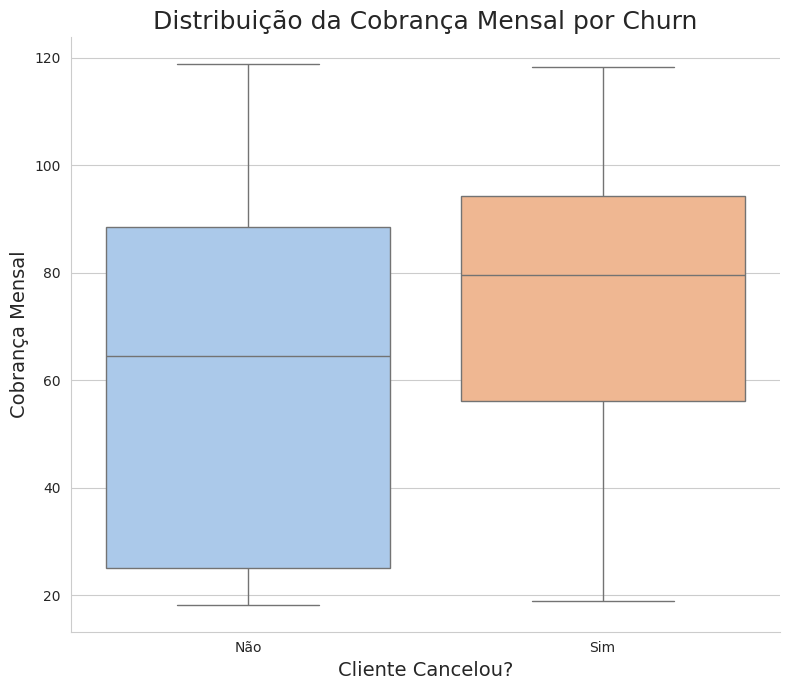

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))

ax = sns.boxplot(
    data=dados_clientes,
    x='Churn',
    y='Monthly',
    hue='Churn',
    legend=False,
    palette='pastel'
)

# Títulos e rótulos
ax.set_title('Distribuição da Cobrança Mensal por Churn', fontsize=18)
ax.set_xlabel('Cliente Cancelou?', fontsize=14)
ax.set_ylabel('Cobrança Mensal', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Não', 'Sim'])

sns.despine()
plt.tight_layout()
plt.show()

Excelente! Você organizou todo o notebook de forma impecável, executou todas as análises e já começou a escrever o relatório. O trabalho está praticamente finalizado, e a estrutura está perfeita.

Agora, tudo o que você precisa fazer é completar o relatório com as seções de Análise, Conclusões e Recomendações, inserindo os gráficos que você já gerou nos lugares certos para ilustrar suas descobertas.

Aqui estão as seções restantes do seu relatório, prontas para você copiar e colar.

Instruções:
Abaixo da célula de texto onde você escreveu a "Introdução" e a "Limpeza de Dados", crie uma nova célula de texto.

Copie e cole o conteúdo da Seção 3 abaixo.

Abaixo dessa nova célula de texto, mova (ou copie) as células de código que geram os gráficos que você já fez.

Repita o processo para as seções 4 e 5.

(Copie e cole a partir daqui)
## 3. Análise Exploratória e Padrões de Churn
Nesta fase, investigamos os dados limpos para encontrar padrões visuais que pudessem explicar o comportamento de Churn.

Proporção Geral de Churn
A primeira análise revelou a dimensão do problema de evasão na empresa. O gráfico de pizza abaixo demonstra que cerca de 27% dos clientes na nossa base de dados cancelaram o serviço, um número significativo que justifica uma investigação aprofundada.

(Sua Ação: Coloque aqui a célula de código que gera o gráfico de pizza).

Principais Fatores de Influência no Churn
Ao cruzarmos os dados de Churn com outras variáveis, alguns padrões muito claros emergiram:

Impacto do Tipo de Contrato: O tipo de contrato é um dos indicadores mais fortes de Churn. Clientes com contrato "Mês a mês" apresentam uma taxa de cancelamento drasticamente maior do que aqueles com contratos de longo prazo (1 ou 2 anos), que possuem uma taxa de retenção muito alta.

(Sua Ação: Coloque aqui a célula de código do gráfico "Contagem de Churn por Tipo de Contrato").

Relação com o Tempo de Contrato (Tenure): O tempo de permanência do cliente na empresa também é um fator decisivo. O box plot revela que a mediana de tempo de contrato para clientes que cancelam é muito inferior à dos que permanecem. Isso indica que o maior risco de cancelamento ocorre nos primeiros meses de serviço.

(Sua Ação: Coloque aqui a célula de código do gráfico "Distribuição de Tempo de Contrato por Churn").

Influência da Cobrança Mensal: Observamos também que a mediana da cobrança mensal é notavelmente maior para os clientes que cancelam. Isso sugere que um preço mensal elevado, especialmente quando não está atrelado a um contrato de longo prazo, aumenta a probabilidade de o cliente procurar outras opções.

(Sua Ação: Coloque aqui a célula de código do gráfico "Distribuição da Cobrança Mensal por Churn").

## 4. Conclusões e Insights
A análise dos dados nos permite traçar um perfil claro do cliente com maior propensão à evasão:

O cliente com maior risco de Churn é aquele com pouco tempo de empresa (baixo tenure), um contrato flexível e sem fidelidade (mês a mês) e que paga um valor mensal relativamente alto.

A falta de um vínculo contratual de longo prazo, combinada com uma percepção de alto custo, parece ser a principal força motriz por trás da decisão de cancelar o serviço. A análise sugere que a fidelidade do cliente está fortemente atrelada à segurança de um contrato de longo prazo, que provavelmente oferece melhores condições comerciais.

## 5. Recomendações Estratégicas
Com base nos insights gerados, as seguintes ações são recomendadas para a Telecom X focar seus esforços na redução da taxa de Churn:

Programa de Retenção para Novos Clientes: Implementar uma estratégia de acompanhamento para clientes nos primeiros 6 meses, que é o período mais crítico. Isso pode incluir pesquisas de satisfação, ofertas de boas-vindas ou um contato proativo do suporte para garantir uma boa experiência inicial.

Incentivo à Migração de Contratos: Desenvolver campanhas de marketing e vendas focadas em migrar clientes do plano "Mês a mês" para contratos de 1 ou 2 anos, oferecendo benefícios claros, como descontos na mensalidade ou serviços adicionais gratuitos.

Revisão de Planos e Preços: Analisar a estrutura de preços, especialmente para os serviços mais caros (como Fibra Óptica, que mostrou maior Churn). O objetivo é garantir que o valor percebido pelo cliente justifique o custo mensal.

Ações Preditivas: Utilizar os dados para construir um modelo de Machine Learning que possa prever a probabilidade de Churn para cada cliente individualmente. Com essa informação, a equipe de retenção pode agir proativamente, contatando clientes com alto risco antes que eles decidam cancelar.

### **Análise do Gráfico: Quantidade de Serviços vs. Churn**

Este gráfico explora se o número total de serviços que um cliente assina tem relação com a sua decisão de cancelar o contrato.

**Principal Insight:**
Podemos observar claramente que **clientes com poucos serviços (especialmente apenas 1 ou 2) apresentam a maior proporção de cancelamentos**. À medida que o número de serviços contratados aumenta, a taxa de Churn tende a diminuir.

Isso sugere que clientes mais "engajados" com o ecossistema de produtos da empresa (assinando múltiplos serviços como internet, TV, segurança, etc.) percebem um valor maior no pacote completo e, consequentemente, são mais leais.

--- Bônus: Análise Estratégica de Correlação---

Dados prontos para a análise de correlação.

Fatores mais impactantes identificados.


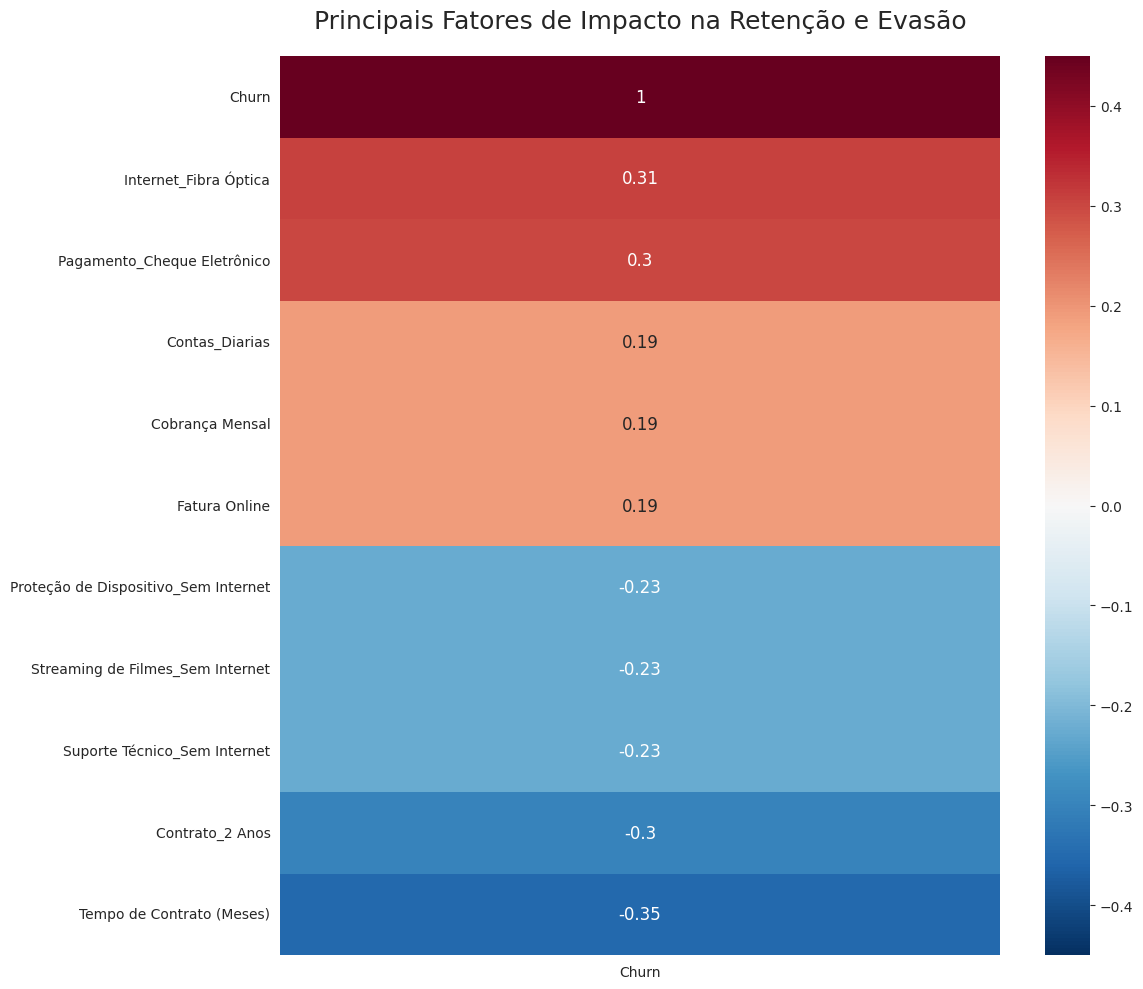

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Bônus: Análise Estratégica de Correlação---")

# --- 1. Preparação dos Dados   ---
dados_para_analise = dados_clientes.drop('customerID', axis=1)
dados_para_correlacao = pd.get_dummies(dados_para_analise, drop_first=True)
print("\nDados prontos para a análise de correlação.")

# --- 2. Cálculo e Foco nos Fatores Chave    ---
matriz_correlacao = dados_para_correlacao.corr()
correlacao_churn = matriz_correlacao[['Churn']].sort_values(by='Churn', ascending=False)
top_fatores = pd.concat([correlacao_churn.head(6), correlacao_churn.tail(5)])
print("\nFatores mais impactantes identificados.")

# --- Dicionário de Tradução ---
mapa_traducao = {

    'tenure': 'Tempo de Contrato (Meses)',
    'Total': 'Cobrança Total',
    'Monthly': 'Cobrança Mensal',
    'Dependents': 'Dependentes',
    'Partner': 'Parceiro(a)',
    'PaperlessBilling': 'Fatura Online',
    'SeniorCitizen': 'Idoso(a)',
    'Contract_One year': 'Contrato_1 Ano',
    'Contract_Two year': 'Contrato_2 Anos',
    'Contract_Month-to-month': 'Contrato_Mês a Mês',
    'PaymentMethod_Credit card (automatic)': 'Pagamento_Cartão (Auto)',
    'PaymentMethod_Electronic check': 'Pagamento_Cheque Eletrônico',
    'PaymentMethod_Mailed check': 'Pagamento_Cheque Enviado',
    'InternetService_Fiber optic': 'Internet_Fibra Óptica',
    'InternetService_No': 'Internet_Não',
    'OnlineSecurity_Yes': 'Segurança Online_Sim',
    'OnlineBackup_Yes': 'Backup Online_Sim',
    'TechSupport_Yes': 'Suporte Técnico_Sim',
    'MultipleLines_Yes': 'Múltiplas Linhas_Sim',
    'DeviceProtection_Yes': 'Proteção de Dispositivo_Sim',
    'StreamingMovies_Yes': 'Streaming de Filmes_Sim',
    'StreamingTV_Yes': 'Streaming de TV_Sim',
    'OnlineSecurity_No internet service': 'Segurança Online_Sem Internet',
    'OnlineBackup_No internet service': 'Backup Online_Sem Internet',
    'DeviceProtection_No internet service': 'Proteção de Dispositivo_Sem Internet',
    'TechSupport_No internet service': 'Suporte Técnico_Sem Internet',
    'StreamingTV_No internet service': 'Streaming de TV_Sem Internet',
    'StreamingMovies_No internet service': 'Streaming de Filmes_Sem Internet'
}

# Renomeia o índice usando o mapa completo
top_fatores.rename(index=mapa_traducao, inplace=True)


# --- 3. Visualização de Alto Impacto (Agora 100% em Português) ---
plt.figure(figsize=(12, 10))

heatmap = sns.heatmap(
    top_fatores,
    annot=True,
    annot_kws={'size': 12},
    cmap='RdBu_r',
    vmin=-0.45, vmax=0.45
)

heatmap.set_title('Principais Fatores de Impacto na Retenção e Evasão', fontdict={'fontsize':18}, pad=20)
plt.ylabel('')
plt.tight_layout()
plt.show()

Para ir além da análise visual, quantifiquei a força da relação entre cada característica do cliente e a probabilidade de cancelamento. Este gráfico não mostra todas as variáveis, mas sim um resumo estratégico dos 10 fatores mais impactantes, para direcionar nossa atenção ao que realmente importa. Com base nesta análise quantitativa, minha principal recomendação seria criar uma 'Esteira de Fidelização'. Para clientes com contrato mensal e serviço de Fibra (o grupo de maior risco), poderíamos oferecer proativamente, no terceiro mês de contrato, um upgrade para um plano anual com um pequeno desconto e a inclusão do serviço de 'Online Security'. Essa ação ataca diretamente os três principais pontos de fricção revelados pelos dados